In [1]:
from sklearn.svm import SVR #svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive #구글 드라이브 연결
from pandas_datareader import data as pdr

In [2]:
filename = '/content/drive/MyDrive/Given Data_10/07.xlsx' #파일 읽어오기
df = pd.read_excel(filename, engine='openpyxl')
print(df)

          Date    Open    High     Low   Close     Adj Close  Volume
0   2020-01-02  321000  321000  313500  314000  299408.90625  139496
1   2020-01-03  317000  318500  310500  311000  296548.34375  165030
2   2020-01-06  308000  311000  306500  307000  292734.18750  138154
3   2020-01-07  306000  313500  305000  311000  296548.34375  133788
4   2020-01-08  306000  307000  301500  302000  287966.53125  225471
..         ...     ...     ...     ...     ...           ...     ...
938 2023-10-24  481000  494000  463000  492000  492000.00000  340115
939 2023-10-25  489000  489000  456500  458000  458000.00000  405933
940 2023-10-26  437000  442000  424500  426000  426000.00000  685812
941 2023-10-27  426000  448000  426000  438500  438500.00000  601730
942 2023-10-30  429500  456000  427500  445000  445000.00000  363083

[943 rows x 7 columns]


In [8]:
fin = df.tail(len(df)) #데이터 전체
stock_close = fin['Adj Close'] #종가 전체 데이터
stock_close = stock_close.values

In [9]:
days = [] #임의로 데이터당 숫자 지정
for i in range(len(fin)):
  days.append([int(i)])
  i=i+1

In [5]:
lin_svr = SVR(kernel='linear', C=1000) #커널을 linear로 설정
lin_svr.fit(days,stock_close)

poly_svr = SVR(kernel='poly', C=1000, degree=5, coef0=1.0) #커널을 poly로 설정
poly_svr.fit(days,stock_close)

rbf_svr = SVR(kernel='rbf',C=10000,gamma=0.5) #커널을 rbf로 설정
rbf_svr.fit(days,stock_close)

SVR(C=10000, gamma=0.5)

In [6]:
new_days = np.arange(1, len(df))
day = np.array([[len(df) + 1]])  # 다음 날을 예측하기 위해 적절한 방법으로 설정합니다.

lin_predictions = lin_svr.predict(day)
poly_predictions = poly_svr.predict(day)
rbf_predictions = rbf_svr.predict(day)

print('다음 날 예측 (linear): ', lin_predictions)
print('다음 날 예측 (polynomial): ', poly_predictions)
print('다음 날 예측 (RBF): ', rbf_predictions)

다음 날 예측 (linear):  [678163.02497337]
다음 날 예측 (polynomial):  [685250.67444383]
다음 날 예측 (RBF):  [651145.05990523]


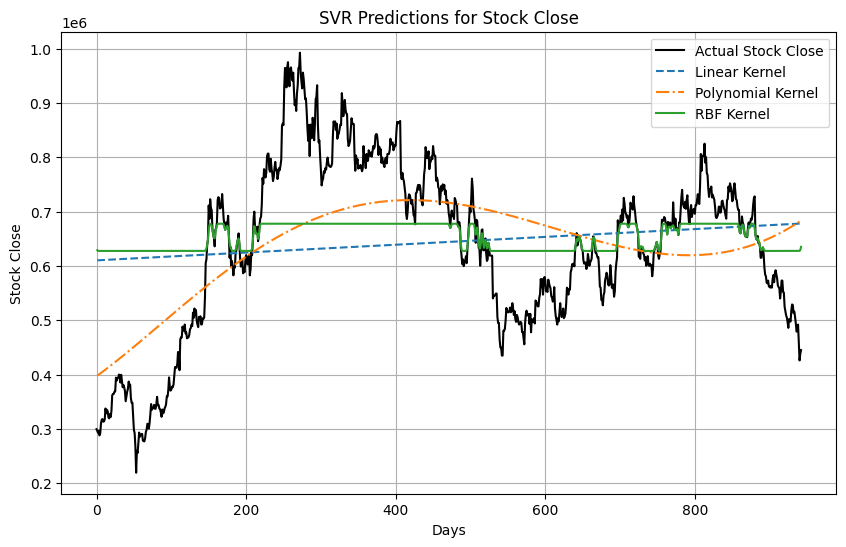

In [7]:
# 예측값의 길이를 new_days와 동일하도록 조정
lin_predictions = lin_svr.predict(np.array(new_days).reshape(-1, 1))
poly_predictions = poly_svr.predict(np.array(new_days).reshape(-1, 1))
rbf_predictions = rbf_svr.predict(np.array(new_days).reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(days, stock_close, label='Actual Stock Close', color='black')

plt.plot(new_days, lin_predictions, label='Linear Kernel', linestyle='--')
plt.plot(new_days, poly_predictions, label='Polynomial Kernel', linestyle='-.')
plt.plot(new_days, rbf_predictions, label='RBF Kernel', linestyle='-')

plt.xlabel('Days')
plt.ylabel('Stock Close')
plt.title('SVR Predictions for Stock Close')
plt.legend()
plt.grid(True)
plt.show()